#Uczenie się ze wzmocnieniem

Przyszedł czas na zapoznanie się z ostanim z paradygmatów, jakim jest uczenie ze wzmocnieniem. Jest to ogromny obszar sztucznej inteligencji z wieloma fascynującymi zastosowaniami. Przykłady, które znajdują się w dalszej części lekcji jedynie wprowadzą uczestnika do zagadnienia, w celu umożliwienia dalszego pogłębiania wiedzy.

Zanim przejdziemy do wprowadzenia algorytmów, należy zapoznać się z kilkoma pojęciami, ze wzgledu na to jak ta metoda uczenia różni się od tych poznanych w poprzednich lekcjach.





##Terminiologia
W tej metodzie zamiast podawania do modelu uczenia i trenowania na ich podstawie danych, model uczy się za pomocą metody prób i błędów. Jest to podobna metoda, na podstawie której uczą się ludzie, czyli wyciąganie wniosków z błędów, które popełniono, oraz zmiana podejścia do sytuacji w przyszłości.

![grafika1](https://drive.google.com/uc?id=1wLETKz_AVmK-vkO4l7Z3ahKJcsCx-W5a)

Rys. 1
###Podstawowe pojęcia

* Środowisko - jest obszarem, z którym agent będzie wchodził w interakcję, przykładem może być poziom w grze.
* Agent - model uczenia, jednostka, która będzie eksplorowała środowisko, przykładowo postać w grze.
* Stan - jest to obecny stan, w którym znajduje się nasz agent. Od niego zależy jakie akcje może on wykonywać.
* Akcja - czynność, którą wykonuje agent wchodząc w interakcję z środowiskiem, może ona prowadzić do zmiany obecnego stanu, w którym znajduje się agent.
* Nagroda - jest najważniejszym elementem tego paradygmatu. To na jej podstawie dokonywana jest nauka, nagroda jest wartością, którą otrzymuje agent za wykonanie akcji.
* Scenariusz - to od niego zależeć będzie jaką akcję wykona model, różne algorytmy będą wprowadzały inne zmiany do scenariusza w celu optymalizacji nauki.

Paradygmat ten polega na eksploracji i eksploitacji środowiska w celu osiągnięcia założonego zadania. Koniecznym krokiem jest określenie akcji, które może podejmować agent w celu wejścia w interakcję z środowiskiem. Agent uczy się podejmować akcje w celu zmaksymalizowania nagrody. Przykładem może być mysz w labiryncie, która uczy się dotrzeć do sera (nagrody) przy wyjściu w jak nakrótszym czasie.

Tak jak zostało to już wspomniane, pojęcie uczenia się ze wzmocnieniem jest ogromnym obszarem, a lekcja ta będzie jedynie eksplorowała jego mały fragment. Dla osób zainteresowanych tematem, odysłam do [tego arytułu](https://smartlabai.medium.com/reinforcement-learning-algorithms-an-intuitive-overview-904e2dff5bbc), który szerzej wprowadzi uczestnika do innych zagadnień tego paradygmatu.

#Dlaczego Q-learning

Jest on jednym z najpopularniejszych algorytmów uczenia się ze wzmocnieniem, cechuje się on niskim kosztem nauki przy szybkiej iteracji środowiska, jego zadaniem jest optymalizacja funkcji wartości akcji Q.

##Zasada działania

Algorytm Q-learning, będzie polegał na aktualizacji wartości funkcji Q dla poszczególnych stanów i akcji, aktualizację funkcji można zapisać w postaci:

> $ Q[s_{t}, a_{t}] \leftarrow Q[s_{t}, a_{t}] + \alpha * (r_{t} + \gamma * max(Q[s_{t+1}, a]) - Q[s_{t}, a_{t}])$
* t - krok czasu
* $a_{t}$ - oznacza akcję do podjęcia w danym kroku t
* $s_{t}$ - oznacza dany stan w kroku t
* $\alpha$ - współczynnik nauki, im mniejsza wartość, tym mniejsze aktualizacje wartości funkcji wartości aktywacji Q
* $\gamma$ - współczynnik dyskontowania, służy do balansowania nacisku na obecne nagrodu względem możliwej przyszłej nagrody

##Wizualizacja

Do wizualizacji działania algorytmu posłuży przykład z [źródła(link dac)]() Grid 6 ze względu na jego tablicowy charakter, gdzie każde pole w jasny sposób odpowiada jednemu stanowi.

![grid6](https://drive.google.com/uc?id=1yiJGIg7WU3p_3Fi21gCXPNvZs1-bjbN2)

Jest to klasyczny przykład labiryntu z przeszkodami w postaci ścian zobrazowanych jako czarne wypełnienie pola.

Nagrody zostały ustalone w następujący sposób:

* wejście na pole 05: nagroda 1
* wejście na pole 55: nagroda 0.5
* wejście na każde inne pole niebędące ścianą, lub pozostanie w miejscu: nagroda 0

Ustalenie 2 nagród w ten specyficzny sposób pozwoli na zobrazowanie specyficznego problemu algorytmu.

##Realizacja przykładu

W standardowej realizacji algorytmu Q-learningu używa się tak zwanych epizodów, które są kolejnymi podejściami agenta do uczenia się funkcji wartości Q. Jest to wymagane, ponieważ ilość kroków, które może podjąć agent nie jest nieskończona, jest z góry ograniczona. Krokiem można nazwać każdą podejmowaną akcję.

Rozwijając poprzednio wspomniany temat wykonywania akcji, zostanie wyjaśniony sposób jej wyboru. W pojęciu uczenia się ze wzmocnieniem istnieją algorytmy, które posiadają określone sposoby na wybór akcji w każdym kroku, nie ma to jednak miejsca w Q-learningu. Jest on rodzajem algorytmu niezależnego od strategii, oznacza to że agent może posługiwać się inną strtegią niż ta, której się uczy.

Załóżmy teraz kilka potencjalnych scenariuszy.

###Scenariusz 1

![grid6](https://drive.google.com/uc?id=1f-iCmDWtCCwRIsmOM-SPqQc4soLGR-Ve)

Kolorem czerwonym została zaznaczona przykładowa trasa przebyta przez agenta.

Ze względu na ograniczoną ilość kroków w każdym z epizodów, agent może nigdy nie uzyskać nagrody o większej wartości niż 0. W tym przypadku strategia nauki oraz funkcja wartości będą "puste" ponieważ agent nigdy nie otrzyma nagrody, a co za tym idzie nie będzie w stanie wyznaczyć optymalnej strategi do jej otrzymania.

###Scenariusz 2

![grid6](https://drive.google.com/uc?id=1GRbqBjifoTj5sjutl0QGjM6owz7cBtvB)

W tym scenariuszu agent dotarł do nagrody o wartości 0.5, i nie napotkał wartości 1. Zadaniem jest optymalizacja nagrody, akcja wynonania ruchu w prawo z pola 54 na pole 55 będzie kojarzona z otzymaniem nagrody, dotarcia do celu. Z tego powodu agent będzie próbował ustalić optymalną strategię dotarcia do stanu 55, pomijając potencjalnie wyższą nagrodę.

Zjawisko to jest nazywane lokalnym maximum, można było to zauważyć wcześniej przy omawianiu algorytmu spadku gradientu w poprzednich lekcjach.

W celu uniknięcia takiego zachowania, algorytm podejmuje z ustaloną częstotliwościa losowe akcje w celu zbalansowania otrzymanej nagrody oraz dostatecznej eksploracji środowiska.

###Scenariusz 3

![grid6](https://drive.google.com/uc?id=12Z1ncG-jihNzNPQEt-T3m6NldndOfFcf)

Agent "dostatecznie" poznał  środowisko, będzie on dążył do ustalenia optymalnej strategii dotarcia do stanu 05.

##Wnioski

Były to przykładowe scenariusze dotyczące problemu typu labirynt, ilość możliwych scenariuszy jest nieskończenie wielka zależnie od środowiska, gdzie każde środowisko może mieć swoje własne warianty i problemy.

Realizacja algorytmów uczenia się ze wzmocnieniem polega na dobraniu odpowiedniego algorytmu, oraz odpowiednim zrozumieniu środowiska, w którym działamy. Poniżej przejdziemy do przykładów podchodzących w różny sposób do danych problemów.



##FrozenLake

W celu zrealizowania algorytmu w przykładzie zostało użyte gotowe środowisko z biblioteki [OpenAI gym](https://gym.openai.com/). Posiada ona wiele różnorodnych, gotowych środowisk w celu ułatwienia nauki uczenia się ze wzmocnieniem. Dla tego przykładu zostanie wykorzystane środowisko tekstowe FrozenLake które jest rodzajem labiryntu, co będzie idealne jako wstępny przykład.

Celem agenta jest dotarcie do celu i omijanie dziur, agent może się poślizgnąć i pójść na inne pole niż zostało to przez niego zamierzone. Agent nawiguje po labiryncie o polu 4x4 i zawiera on następujące pola:
* S - start
* F - bezpieczna, ale śliska nawierzchnia
* H - dziura, wpadnięcie oznacza śmierć agenta
* G - cel do osiągnięcia

Możliwe akcje to ruch w kierunku:
* Góra
* Dół
* Lewo
* Prawo

Tak jak zostało to już wpomniane, agent może się poślignąć, oznacza to że przy próbie wykonania ruchu, istnieje jedynie 33% szans na pójście w prawidłowym kierunku oraz po 33% na pojście w sąsiednie kierunki. 

Istnieje też opcjonalna funkcjonalność, która znacznie utrudnia otrzymanie zoptymalizowanej strategii, agent może umrzeć wpadając w dziurę nawet przy znajomości poprawnej drogi do celu. Utrudnia to również "napotkanie" celu, nawet przy ustaleniu wysokiego limitu ruchów agenta dla generacji, ale nadal istnieje duża szansa na jego przedwcześną śmierć.

Link do [dokumentacji](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/).

###Biblioteki i parametry inicjalizacyjne

In [ ]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from IPython.display import clear_output

env = gym.make('FrozenLake-v0')
#--------------------------------------------
#env = gym.make('FrozenLake-v0', is_slippery=False) #is_slippery=False wyłącza ślizganie się agenta
#--------------------------------------------
#env = gym.make("FrozenLake8x8-v0")                 #gotowy labirynt o rozmiarze 8x8 wymaga ogromnej ilości epizodów aby agent kiedykolwiek trafił do celu
#--------------------------------------------
#map = generate_random_map(size=5, p=0.7)           #generuje losowy labirynt size - oznacza rozmiar x na x, p - proporcje występowania pól H do F
#env = gym.make("FrozenLake-v0", desc=map)          #wczytuje środowsko z customową mapą

env.render() #render labiryntu

STATES = env.observation_space.n  #odzczytanie ilości stanów
ACTIONS = env.action_space.n      #odczytanie ilości akcji

Q = np.zeros((STATES, ACTIONS))   #wygenerowanie tablicy Q

EPISODES = 5000      #ile razy agent wyruszy na przemierzanie labiryntu
MAX_STEPS = 200      # ile kroków przy każdej wyprawie może wykonać agent

LEARNING_RATE = 0.8  # wspołczynnik uczenia

GAMMA = 0.8    #wspołczynnik dyskontowania
EPSILON = 0.9  #prawdopodobieństwo podjęcia losowej akcji przez agenta


SFFF
FHFH
FFFH
HFFG


###Nauka

In [ ]:
rewards_all = []        #tablica przechowująca nagrody z poszczególnych wypraw
episode_steps_all = []  #tablica przechowująca ilość kroków agenta w danym episodzie

for episode in range(EPISODES):
  
  episode_reward = 0 
  episode_steps = 0
  state = env.reset()   #reset stanu na start wyprawy

  for step in range(MAX_STEPS):

    if np.random.uniform(0, 1) < EPSILON:  #podjęcie decyzji o podjęciu losowej akcji lub akcji o największej nagrodzie
      action = env.action_space.sample() 
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, info = env.step(action)  #odczytanie kolejnego stanu
    Q[state, action] = Q[state, action] + (LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])) #zaktualizowanie tablicy Q
    
    state = next_state        #przejście do kolejnego stanu
    episode_reward += reward  #inkrementacja całkowitej nagrody dla episodu
    episode_steps += 1        #inkrementacja ilości podjętych kroków w episodzie

    if done:  #jeżeli agent dotarł do celu albo wpadł do dziury przerywamy episod
      break   

  if EPSILON > 0.01:  #degradacja parametru Epsilon służy do zmienienia podejścia agenta do podejmowanych króków wraz z upływem czasu
    EPSILON -= 0.001
        
  rewards_all.append(episode_reward)       #zapisanie pełnej nagrody dla episodu
  episode_steps_all.append(episode_steps)  #zapisanie pełnej ilości podjętych kroków w episodzie

###Wizualizacja wyników

Teraz kiedy nasz agent przećwiczył przechodzenie labiryntu, przyszedł czas na sprawdzenie jak sie sprawił

Q-tablica
[[3.75753967e-04 2.34118879e-04 6.89037173e-04 3.92293612e-04]
 [7.12608237e-06 4.44756422e-05 6.07793775e-08 4.26098033e-03]
 [7.00830638e-03 2.64614943e-06 2.67579412e-06 1.50050037e-04]
 [1.69868634e-05 1.09938299e-06 1.43953603e-06 1.33256594e-04]
 [2.79004317e-03 8.06501467e-05 5.82099437e-05 4.51076965e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.73831073e-02 5.44632236e-07 7.42593547e-07 3.08390988e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.95678975e-04 2.24146737e-03 1.42495386e-03 2.61459125e-03]
 [9.23212869e-05 9.75598836e-02 6.54920080e-04 1.50025525e-03]
 [1.28312596e-01 1.10685219e-03 3.65974635e-04 5.77151535e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.94189628e-03 4.08858467e-03 7.33236708e-02 1.19158200e-02]
 [7.76498080e-02 2.55893420e-01 5.18425845e-02 5.35106650e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+0

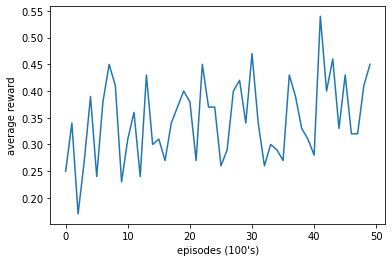

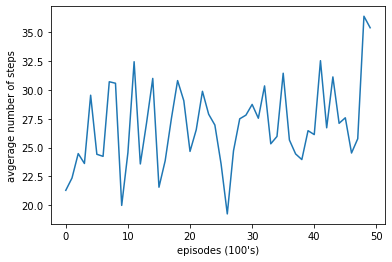

In [ ]:
print("Q-tablica")
print(Q)

env.close()
success_rate = round((sum(rewards_all) / EPISODES) * 100, 2)  #procentowa wartość osiągniecia celu do wpadnięcia do dziury

print("Agent dotarł do celu", str(success_rate), "% razy z", str(EPISODES), "epizodów")

#Poniżej wyświetlamy zapisane wcześniej dane na wykresach
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards_all), 100):
  avg_rewards.append(get_average(rewards_all[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

avg_steps = []
for i in range(0, len(episode_steps_all), 100):
  avg_steps.append(get_average(episode_steps_all[i:i+100])) 

plt.plot(avg_steps)
plt.ylabel('avgerage number of steps')
plt.xlabel('episodes (100\'s)')
plt.show()

###Render agenta

W przykładzie nie zostało użyte renderowanie agenta z uwagi na znaczne wydłużenie czasu uczenia, uproszczona wersja kodu wraz z renderowaniem została pobrana z [danego źródła](https://github.com/theone9807/8x8-FrozenLake-Q-Learning/blob/master/8x8%20frozenlake(task%201).ipynb).

In [ ]:
for episode in range(3):
    state = env.reset()
    step = 0
    done = False
    print("Episode ", episode+1, "")
    time.sleep(1)
    
    for step in range(MAX_STEPS):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
    
        action = np.argmax(Q[state,:])        
        new_state, reward, done, info = env.step(action)
    
        state = new_state
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You have reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
            clear_output(wait=True)
            break
        step += 1
    
env.close()

###Pełny Kod

Poniżej znajduje się pełny kod z przykładu, zachęca się do modyfikacji parametrów w celu zbadania ich działania na algorytm.

In [ ]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
from IPython.display import clear_output

env = gym.make('FrozenLake-v0')
#--------------------------------------------
#env = gym.make('FrozenLake-v0', is_slippery=False) #is_slippery=False wyłącza ślizganie się agenta
#--------------------------------------------
#env = gym.make("FrozenLake8x8-v0")                 #gotowy labirynt o rozmiarze 8x8 wymaga ogromnej ilości epizodów aby agent kiedykolwiek trafił do celu
#--------------------------------------------
#map = generate_random_map(size=5, p=0.7)           #generuje losowy labirynt size - oznacza rozmiar x na x, p - proporcje występowania pól H do F
#env = gym.make("FrozenLake-v0", desc=map)          #wczytuje środowsko z customową mapą

env.render() #render labiryntu

STATES = env.observation_space.n  #odzczytanie ilości stanów
ACTIONS = env.action_space.n      #odczytanie ilości akcji

Q = np.zeros((STATES, ACTIONS))   #wygenerowanie tablicy Q

EPISODES = 5000      #ile razy agent wyruszy na przemierzanie labiryntu
MAX_STEPS = 200      # ile kroków przy każdej wyprawie może wykonać agent

LEARNING_RATE = 0.8  # wspołczynnik uczenia

GAMMA = 0.8    #wspołczynnik rabaru
EPSILON = 0.9  #prawdopodobieństwo podjęcia losowej akcji przez agenta

rewards_all = []        #tablica przechowująca nagrody z poszczególnych wypraw
episode_steps_all = []  #tablica przechowująca ilość kroków agenta w danym episodzie

for episode in range(EPISODES):
  
  episode_reward = 0 
  episode_steps = 0
  state = env.reset()   #reset stanu na start wyprawy

  for step in range(MAX_STEPS):

    if np.random.uniform(0, 1) < EPSILON:  #podjęcie decyzji o podjęciu losowej akcji lub akcji o największej nagrodzie
      action = env.action_space.sample() 
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, info = env.step(action)  #odczytanie kolejnego stanu
    Q[state, action] = Q[state, action] + (LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])) #zaktualizowanie tablicy Q
    
    state = next_state        #przejście do kolejnego stanu
    episode_reward += reward  #inkrementacja całkowitej nagrody dla episodu
    episode_steps += 1        #inkrementacja ilości podjętych kroków w episodzie

    if done:  #jeżeli agent dotarł do celu albo wpadł do dziury przerywamy episod
      break   

  if EPSILON > 0.01:  #degradacja parametru Epsilon służy do zmienienia podejścia agenta do podejmowanych króków wraz z upływem czasu
    EPSILON -= 0.001
        
  rewards_all.append(episode_reward)       #zapisanie pełnej nagrody dla episodu
  episode_steps_all.append(episode_steps)  #zapisanie pełnej ilości podjętych kroków w episodzie

print("Q-tablica")
print(Q)

env.close()
success_rate = round((sum(rewards_all) / EPISODES) * 100, 2)  #procentowa wartość osiągniecia celu do wpadnięcia do dziury

print("Agent dotarł do celu", str(success_rate), "% razy z", str(EPISODES), "epizodów")

#Poniżej wyświetlamy zapisane wcześniej dane na wykresach
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards_all), 100):
  avg_rewards.append(get_average(rewards_all[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

avg_steps = []
for i in range(0, len(episode_steps_all), 100):
  avg_steps.append(get_average(episode_steps_all[i:i+100])) 

plt.plot(avg_steps)
plt.ylabel('avgerage number of steps')
plt.xlabel('episodes (100\'s)')
plt.show()

##Acrobot

Q-learning jest algorytmem z dużą ilością zastosowań, dotyczy to jednak problemów o określonej ilości stanów. W poprzednim przykładzie mieliśmy labirynt o określonym wymiarze, gdzie ilość jest z góry ustalona i stosunkowo niewielka.

![grid6](https://drive.google.com/uc?id=1eWoXTZvVImr3iJhKYPosaIdadvAry7So)

W tym przykładzie realizujemy przykład Acrobota, którego zadaniem jest "rozmachanie" dolnego swobodnego ramienia tak aby przekroczyło ono konkretną wysokość, którą pokazuje czarna linia. Może on wykonać 3 akcje:
* obrót ramieniem w lewo
* brak ruchu
* obrót ramieniem w prawo

Limitem ustalonym w Acrobot-v1 jest 500 kroków na epizod, z każdym krokiem otrzymuje on nagrodę -1 co składa się na pełne -500 pkt nagrody na koniec jeżeli nie uda mu się osiągnąć celu.

Co do stanów, jak widać nie jest to tak prosta sprawa jak w poprzednim przykładzie. Do określenia stanu agenta jest używane 6 zmiennych:
* cos kąta pierwszego ramienia
* sin kata pierwszego ramienia
* cos kąta drugiego ramienia względem pierwszego
* sin kąta drugiego ramienia względem pierwszego
* prędkość kątowa pierwszego ramienia
* prędkość kątowa drugiego ramienia

Ilość możliwych stanów, a co za tym idzie rozmiar tablicy Q osiągałby nieprzyzwoite rozmiary, oraz byłby to wysoce nieefektywny algorytm. W tym celu oczywiście powstał szereg rozwiązań, jednym z nich będzie zastosowanie Deep Q-learningu. Jak można się domyślić rozwiązanie to uwzględnia użycie sieci neuronowych, które są używane do przewidywania wartości nagrody w kolejnych stanach.

O ile poprzedni przykład zawierał czysty kod języku Python, w tym przykładzie użyjemy dedykowanej biblioteki z modułu Tensorflow - [Tensorflow Agents](https://www.tensorflow.org/agents), który znacznie ułatwi pracę.

###Biblioteki

In [ ]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents[reverb]
!pip install pyglet

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backpor

     |████████████████████████████████| 1.3 MB 27.0 MB/s 
     |████████████████████████████████| 6.4 MB 49.7 MB/s 
     |████████████████████████████████| 462 kB 44.8 MB/s 


In [ ]:
#Copyright 2022 Hubert Wabia

#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at

#    http://www.apache.org/licenses/LICENSE-2.0

#Unless required by applicable law or agreed to in writing, software
#distributed under the License is distributed on an "AS IS" BASIS,
#WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#See the License for the specific language governing permissions and
#limitations under the License.
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

from tf_agents.networks import q_network

###Parametry inicjalizacyjne

In [ ]:
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()  #wyświetlacz który będzie pokazywał działanie agenta

env_name = 'Acrobot-v1'         
env = suite_gym.load(env_name)  #załadowanie środowiska

print('Obserwacje:')
print(env.time_step_spec().observation)  #przestrzeń obserwacji

print('Nagrody:')
print(env.time_step_spec().reward)       #przestrzeń nagród

print('Akcje:')
print(env.action_spec())                 #przestrzeń akcji

train_py_env = suite_gym.load(env_name)  #załadowanie środowiska do trenowania
eval_py_env = suite_gym.load(env_name)   #załadowanie środowiska do oceny nauki

train_env = tf_py_environment.TFPyEnvironment(train_py_env) #inicjalizacja środowiska
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)   #inicjalizacja środowiska

In [ ]:
num_iterations = 8000  #ilość epizodów

initial_collect_steps = 1000      #ilość iteracji 
collect_steps_per_iteration = 1   #ilość kroków pobierana do drivera
replay_buffer_max_length = 100000 #bufor danych do wyświetlania

batch_size = 128       #ilość kroków przekazanych do sieci neuronowej w jednym zestawie
learning_rate = 1e-3   #parametr uczenia
log_interval = 200     #co ile episodów wyświetlamy wartość funkcji kosztów

num_eval_episodes = 10 #ile episodów używanych do wyliczenia średniej wartości skuteczności nauki
eval_interval = 1000   #co ile episodów dokonujemy oceny nauki

###Agent DQN

W tej metodzie konieczne będzie utworzenie agenta przy użyciu modułu biblioteki tensorflow, więcej informacji o poszczególnych parametrach można uzyskać w [dokumentacji](https://www.tensorflow.org/agents/api_docs/python/tf_agents/agents/DqnAgent).

In [ ]:
q_net = q_network.QNetwork(       #sieć neuronowa
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=(80,40))      #ilość neuronów w wartswach ukrytych

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) #funkcja optymalizacji Adam

train_step_counter = tf.Variable(0) #zliczamy ilość kroków

agent = dqn_agent.DqnAgent(         #parametry agenta głębokiego uczenia
    train_env.time_step_spec(),     
    train_env.action_spec(),
    q_network=q_net,     
    optimizer=optimizer, 
    td_errors_loss_fn=common.element_wise_squared_loss,  #funkcja kosztów
    train_step_counter=train_step_counter)

agent.initialize()  #inicjalizacja agenta z podanymi parametrami

###Strategia

W celu określenia sprawności nauki została stworzona funkcja, której zadaniem będzie przetestowanie obecnie wypracowanej strategii dla podanej ilości epizodów.

In [ ]:
eval_policy = agent.policy  #strategia według której agent będzie się poruszał
collect_policy = agent.collect_policy #dodatkowa zmienna do przechowywania danych

def compute_avg_return(environment, policy, num_episodes):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]

###Replay buffer

Oprócz trenowania agenta, ważnym elementem uczenia się ze wzmocnieniem jest wizualizacja efektów nauki, w tym celu zostanie użyty [Reverb](https://www.deepmind.com/open-source/reverb). Będzie on również odpowiedzialny za gromadzenie "doświadczenia" agenta, które służyć będzie nauce. W tym celu musimy ustalić kilka istotnych parametrów.

In [ ]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_buffer_max_length,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

###PyDriver

Trzon nauki agenta będzie się odbywał za pomocą modułu biblioteki Tensorflow - [PyDriver](https://www.tensorflow.org/agents/api_docs/python/tf_agents/drivers/py_driver/PyDriver), którego zadaniem jest wdrażanie strategii podczas iteracji kroków. W celu stworzenia drivera musimy utorzyć oraz zainicjować kilka zmiennych, niezbędnych do jego stworzenia.

In [ ]:
example_environment = tf_py_environment.TFPyEnvironment(  #środowisko
    suite_gym.load(env_name))

random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())  #na potrzeby drivera stworzymy strategię która będzie przeprowadzała losowe akcje
time_step = example_environment.reset() #resetujemy środowisko
random_policy.action(time_step)         #uzyskujemy pierwszą akcję w środowisku(stan początkowy)

py_driver.PyDriver( #tworzymy drivera z podanymi parametrami
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      random_policy, use_tf_function=True),
    [rb_observer],
    max_steps=initial_collect_steps).run(train_py_env.reset())

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>, state=(), info=())

###Dane

Tak jak zostało to wyżej wspomniane, replay buffer będzie służył do przechowywania danych/doświadczenia nauki. Żeby proces nauki przebiegł pomyślnie, agent musi posiadać dostęp do tych danych.

W tym celu musimy utworzyć strumień, który będzie przekazywał dane do agenta.

In [ ]:
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(3)

iterator = iter(dataset)

###Nauka

Przyszedł czas aby wdrożyć do użytku wszytkie elementy, które utworzyliśmy wcześniej. Sam proces nauki sprowadza się w większości do gromadzenia danych, oraz ich przetworzenia.

In [ ]:
#%%time jest odpowiedzialne za wyświetlenie czasu dostępu do komórki, jest częścią IPython
try:
  %%time
except:
  pass

agent.train = common.function(agent.train)

agent.train_step_counter.assign(0) #wyzerowanie licznika króków

avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes) #wyznaczenie początkowej wartości sprawności nauki
returns = [avg_return]

time_step = train_py_env.reset() #reset środowiska do stanu początkowego

collect_driver = py_driver.PyDriver( #stworzenie drivera który będzie odpowiedzialny za gromadzenie doświadczenia agenta
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      agent.collect_policy, use_tf_function=True),
    [rb_observer],
    max_steps=collect_steps_per_iteration)

for _ in range(num_iterations):

  time_step, _ = collect_driver.run(time_step) #zapisanie kroków do replay buffera

  experience, unused_info = next(iterator)     #pobranie danych poprzez strumień danych
  train_loss = agent.train(experience).loss    #uaktualnienie sieci neuronowej agenta

  step = agent.train_step_counter.numpy()  #aktualizacja zmiennej przechowującej obecny krok

  if step % log_interval == 0:  #checkpoint służący do wyświetlenia danych 
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0: #checkpoint służący do wyświetlenia danych 
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

###Wizualizacja

Wizualizacja sprawności wykonywanego zadania przez nauczonego agenta.

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

def create_policy_eval_video(policy, filename, num_episodes=8, fps=60):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(filename)

create_policy_eval_video(agent.policy, "trained-agent")

###Pełny Kod

Poniżej znajduje się pełny kod z przykładu, zachęca się do modyfikacji parametrów w celu zbadania ich działania na algorytm.

In [ ]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents[reverb]
!pip install pyglet

#Copyright 2022 Hubert Wabia

#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at

#    http://www.apache.org/licenses/LICENSE-2.0

#Unless required by applicable law or agreed to in writing, software
#distributed under the License is distributed on an "AS IS" BASIS,
#WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#See the License for the specific language governing permissions and
#limitations under the License.
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

from tf_agents.networks import q_network

display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()  #wyświetlacz który będzie pokazywał działanie agenta

env_name = 'Acrobot-v1'         
env = suite_gym.load(env_name)  #załadowanie środowiska

print('Obserwacje:')
print(env.time_step_spec().observation)  #przestrzeń obserwacji

print('Nagrody:')
print(env.time_step_spec().reward)       #przestrzeń nagród

print('Akcje:')
print(env.action_spec())                 #przestrzeń akcji

train_py_env = suite_gym.load(env_name)  #załadowanie środowiska do trenowania
eval_py_env = suite_gym.load(env_name)   #załadowanie środowiska do oceny nauki

train_env = tf_py_environment.TFPyEnvironment(train_py_env) #inicjalizacja środowiska
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)   #inicjalizacja środowiska

num_iterations = 8000  #ilość epizodów

initial_collect_steps = 1000      #ilość iteracji 
collect_steps_per_iteration = 1   #ilość kroków pobierana do drivera
replay_buffer_max_length = 100000 #bufor danych do wyświetlania

batch_size = 128       #ilość kroków przekazanych do sieci neuronowej w jednym zestawie
learning_rate = 1e-3   #parametr uczenia
log_interval = 200     #co ile episodów wyświetlamy wartość funkcji kosztów

num_eval_episodes = 10 #ile episodów używanych do wyliczenia średniej wartości skuteczności nauki
eval_interval = 1000   #co ile episodów dokonujemy oceny nauki

q_net = q_network.QNetwork(       #sieć neuronowa
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=(80,40))      #ilość neuronów w wartswach ukrytych

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) #funkcja optymalizacji Adam

train_step_counter = tf.Variable(0) #zliczamy ilość kroków

agent = dqn_agent.DqnAgent(         #parametry agenta głębokiego uczenia
    train_env.time_step_spec(),     
    train_env.action_spec(),
    q_network=q_net,     
    optimizer=optimizer, 
    td_errors_loss_fn=common.element_wise_squared_loss,  #funkcja kosztów
    train_step_counter=train_step_counter)

agent.initialize()  #inicjalizacja agenta z podanymi parametrami

eval_policy = agent.policy  #strategia według której agent będzie się poruszał
collect_policy = agent.collect_policy #dodatkowa zmienna do przechowywania danych

def compute_avg_return(environment, policy, num_episodes):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]

table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_buffer_max_length,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

example_environment = tf_py_environment.TFPyEnvironment(  #środowisko
    suite_gym.load(env_name))

random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())  #na potrzeby drivera stworzymy strategię która będzie przeprowadzała losowe akcje
time_step = example_environment.reset() #resetujemy środowisko
random_policy.action(time_step)         #uzyskujemy pierwszą akcję w środowisku(stan początkowy)

py_driver.PyDriver( #tworzymy drivera z podanymi parametrami
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      random_policy, use_tf_function=True),
    [rb_observer],
    max_steps=initial_collect_steps).run(train_py_env.reset())

dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(3)

iterator = iter(dataset)

#%%time jest odpowiedzialne za wyświetlenie czasu dostępu do komórki, jest częścią IPython
try:
  %%time
except:
  pass

agent.train = common.function(agent.train)

agent.train_step_counter.assign(0) #wyzerowanie licznika króków

avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes) #wyznaczenie początkowej wartości sprawności nauki
returns = [avg_return]

time_step = train_py_env.reset() #reset środowiska do stanu początkowego

collect_driver = py_driver.PyDriver( #stworzenie drivera który będzie odpowiedzialny za gromadzenie doświadczenia agenta
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      agent.collect_policy, use_tf_function=True),
    [rb_observer],
    max_steps=collect_steps_per_iteration)

for _ in range(num_iterations):

  time_step, _ = collect_driver.run(time_step) #zapisanie kroków do replay buffera

  experience, unused_info = next(iterator)     #pobranie danych poprzez strumień danych
  train_loss = agent.train(experience).loss    #uaktualnienie sieci neuronowej agenta

  step = agent.train_step_counter.numpy()  #aktualizacja zmiennej przechowującej obecny krok

  if step % log_interval == 0:  #checkpoint służący do wyświetlenia danych 
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0: #checkpoint służący do wyświetlenia danych 
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

def create_policy_eval_video(policy, filename, num_episodes=8, fps=60):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(filename)

create_policy_eval_video(agent.policy, "trained-agent")

#Zakończenie kursu

Jest to już koniec kursu wprowadzającego do pojęcia sztucznej inteligencji w języku Python. Uczestnik podczas kursu zapoznał się z 3 paradygmatami nauki oraz funkconalnościami biblioteki Tensorflow. 